# **Deep learning entry task**
 <img src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg" align="right" width="200px"/>

[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/en/igp),  
[The Technical University of Braunschweig  ](https://www.tu-braunschweig.de/en/)  
Instructors: [Dr. -Ing. Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) and [Dr. Pedro Achanccaray](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz)
<br clear="left"/>

The purpose of this entry task is to measure your **knowledge of machine learning and artificial neural network concepts**. You should be familiar with these topics for **better understanding and comprehension** of the deep learning course.


For this reason, the entry task should be solved **without using any artificial intelligence tools** (ChatGPT, Copilot, among others). You can only use them to assist you in **debugging** your code.

# **1. Import all necessary packages**

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# **2. Load the Fashion MNIST dataset for image classification**

- Load the Fashion MNIST dataset.
- Create three disjoint sets: train, validation and test (you can use any proportions for these sets).

In [53]:
def plot_class_distribution(y_train, y_val, y_test, classes):
# Number of samples per class
  _, counts_train = np.unique(y_train, return_counts=True)
  _, counts_val = np.unique(y_val, return_counts=True)
  _, counts_test = np.unique(y_test, return_counts=True)

  print("Samples per class for training: ",counts_train)
  print("Samples per class for validation: ",counts_val)
  print("Samples per class for testing: ",counts_test)

  n_classes = len(classes)
  # Figure configuration
  bar_width = 0.25
  br1 = np.arange(n_classes)
  br2 = [x + bar_width for x in br1]
  br3 = [x + bar_width for x in br2]

  # Percentage of samples in each set
  total_samples = sum(counts_train) + sum(counts_val) + sum(counts_test)
  p_train = 100*sum(counts_train)/total_samples
  p_val = 100*sum(counts_val)/total_samples
  p_test = 100*sum(counts_test)/total_samples

  # Bar plot
  plt.figure(figsize=(18,6))

  plt.bar(br1, counts_train, width=bar_width, color="blue", label="Train")
  plt.bar(br2, counts_val, width=bar_width, color="red", label="Validation")
  plt.bar(br3, counts_test, width=bar_width, color="green", label="Test")

  plt.xticks([r + bar_width for r in range(n_classes)], classes, rotation=25)
  plt.legend(loc="upper left", bbox_to_anchor=(1,1))
  plt.title("Dataset distribution\nTrain: {}%,\
              Validation: {}%, Test: {}%".format(np.round(p_train,1),
                                                 np.round(p_val,1),
                                                 np.round(p_test,1)))
  plt.show()

In [54]:
# Loading the Fashion MNIST dataset
df = tf.keras.datasets.fashion_mnist

In [55]:
(x_train, y_train), (x_test, y_test) = df.load_data()

In [56]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Samples per class for training:  [4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
Samples per class for validation:  [1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]
Samples per class for testing:  [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


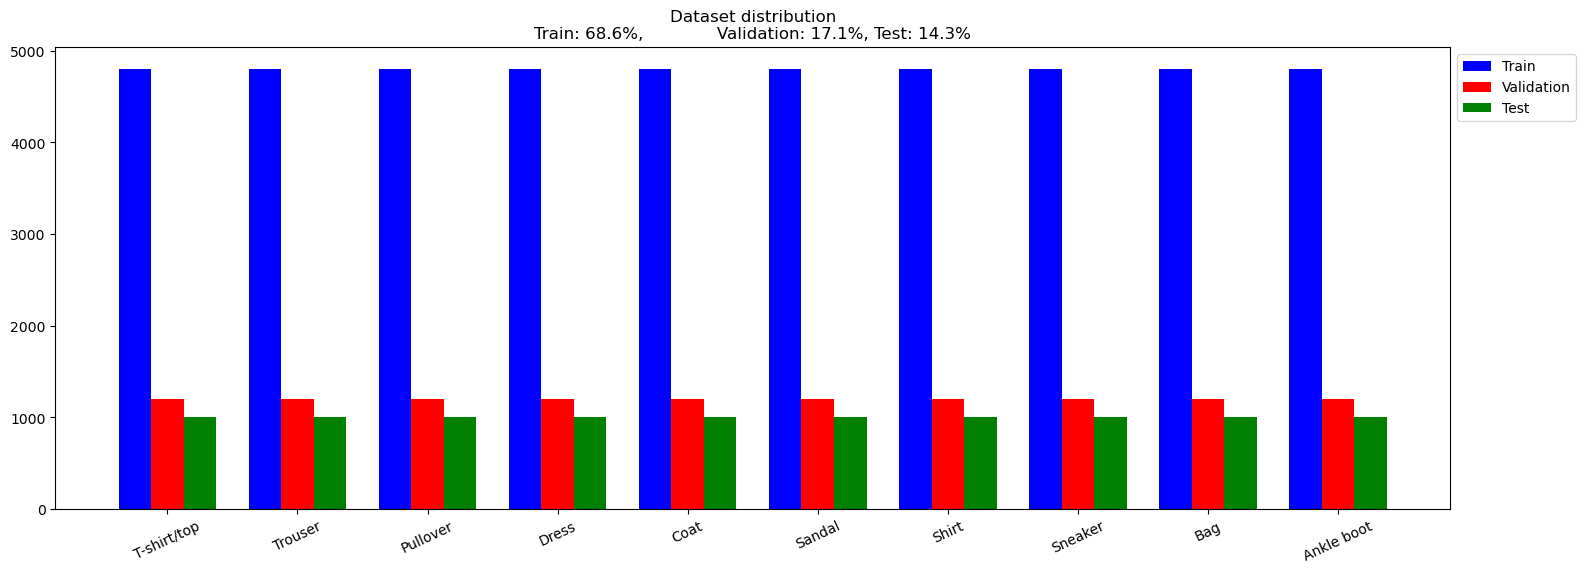

In [57]:
# Split the data into training, validation, and testing sets
x_train, val_images, y_train, val_labels = train_test_split(x_train, y_train, test_size = 0.2, stratify=y_train)

plot_class_distribution(y_train, val_labels, y_test, classes= class_names)

In [61]:
# Normalising the dataset. There are 255 pixels - 0 representing black and 255 representing white.
x_train = x_train/255.0
x_test = x_test/255.0

In [62]:
# Splitting the dataset into train (80%), validation (10%) and test (10%).  
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [63]:
x_train, x_val = x_train / 255.0, x_val / 255.0  # Normalize training and validation data

In your own words, describe the purpose of each set:
- _train_:
- _validation_:
- _test_:

Answer: Training dataset is used to train the model, where the model learns about relationships in the dataset and adjusts its parameters to minimise the difference between predicted value and the actual value. Larger and complex the dataset, better the learning.

Validation dataset is used to evaluate the model's performance. For instance, after each epoch the model's performance is evaluated on this dataset and later hypertunes the parameters like learning rate and regularisation.

Test dataset is like an unseen datatset wherein an unbiased performance of the model is evaluated. It is after the test dataset evaluation, we get to know if the the model is overfitting or underfitting.

# **3. Create a Multi Layer Perceptron (MLP) for image classification**


Feel free to use any configuration (number of hidden layers, number of neurons per layer) and framework (Scikit learn, Keras, TensorFlow, PyTorch, etc.)

In [64]:
# Define MLP architecture

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),              # Input layer: Flatten 28x28 images
    tf.keras.layers.Dense(256, activation='relu'),             # Hidden layer 1: 256 neurons, ReLU activation
    tf.keras.layers.Dropout(0.3),                              # To prevent overfitting
    tf.keras.layers.Dense(128, activation='relu'),             # Hidden layer 2: 128 neurons, ReLU activation
    tf.keras.layers.Dropout(0.3),                              # To prevent overfitting
    tf.keras.layers.Dense(64, activation='relu'),              # Hidden layer 3: 64 neurons, ReLU activation
    tf.keras.layers.Dropout(0.3),                              # To prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')            # Output layer: 10 neurons for 10 classes
])

C:\Users\Disha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **4. Train the model**

Train the model and perform a hyperparameter tuning to find the best learning rate from a set of learning rates (1D grid search).

In [66]:
# Train the model over validation set
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4631 - loss: 1.3782 - val_accuracy: 0.7588 - val_loss: 0.6097
Epoch 2/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7524 - loss: 0.6674 - val_accuracy: 0.7902 - val_loss: 0.5405
Epoch 3/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7864 - loss: 0.5824 - val_accuracy: 0.8215 - val_loss: 0.4850
Epoch 4/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8087 - loss: 0.5303 - val_accuracy: 0.8294 - val_loss: 0.4579
Epoch 5/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8254 - loss: 0.4933 - val_accuracy: 0.8363 - val_loss: 0.4379
Epoch 6/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8316 - loss: 0.4664 - val_accuracy: 0.8400 - val_loss: 0.4167
Epoch 7/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8381 - loss: 0.4547 - val_accuracy: 0.8496 - val_loss: 0.3989
Epoch 8/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8498 - loss: 0.4392 -

1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8982 - loss: 0.2793 - val_accuracy: 0.8742 - val_loss: 0.3391


# **5. Plots**

Plot the evolution of the Loss function and Accuracy values over the epochs (for train and validation sets) during training the best model.

- What can you infere from the training curves of the model? 
- Is there over- or underfitting?

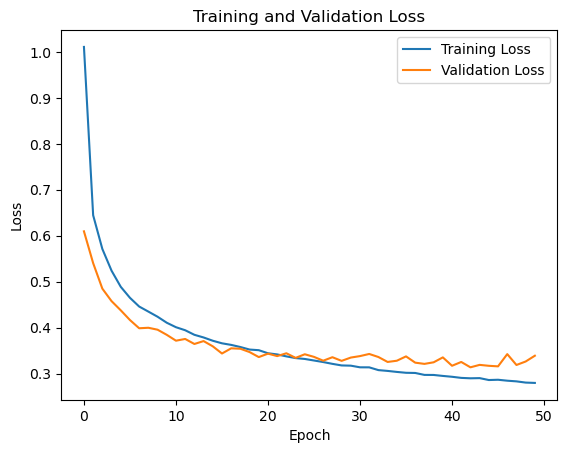

In [67]:
# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

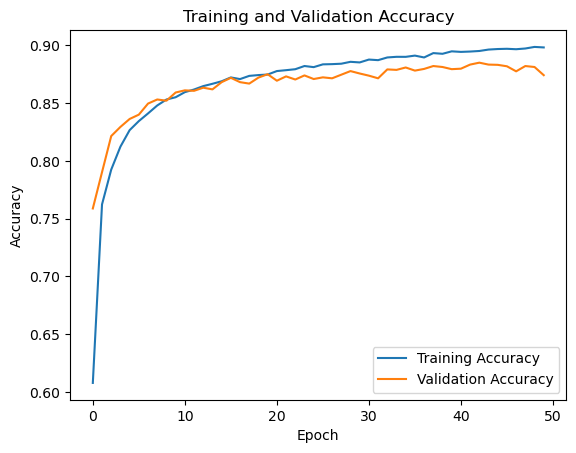

In [68]:
# Plotting the accuracy function
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

To answer the first part of the question, the accuracy of the training set has increased significantly between the first and the third epoch (improving its performance) and reaching the accuracy of ~90%. The accuracy of the validation set is ~90% which is equivalent to the training set. Hence, from this we can infer that the model is performing better on the unseen data.

Furthermore, about the over/underfitting of the model, here Dropout layers has helped in reducing the overfitting of the fitting. This can be seen via the decreasing loss values of the datasets. In short, NO, there is no over/underfitting.

# **6. Run inference**

Run inference in the test set and compute the metrics for testing.

In [69]:
# Inference on the test set
test_loss = model.evaluate(x_test, y_test)
print(test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7721 - loss: 61.2039
[67.55609893798828, 0.7649000287055969]


In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute accuracy score
acc = accuracy_score(y_test, y_pred_classes)
print("Accuracy Score:", acc)

f1 = f1_score(y_test, y_pred_classes, average='weighted')
print("F1 Score:", f1)

precision = precision_score(y_test, y_pred_classes, average='weighted')
print("Precision Score:", precision)

recall = recall_score(y_test, y_pred_classes, average='weighted')
print("Recall Score:", recall)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy Score: 0.7649
F1 Score: 0.757292693849461
Precision Score: 0.8101405122208194
Recall Score: 0.7649


# **7. Test samples**

Show some samples from the test set. Use the following layout: input image, reference class and predicted class.

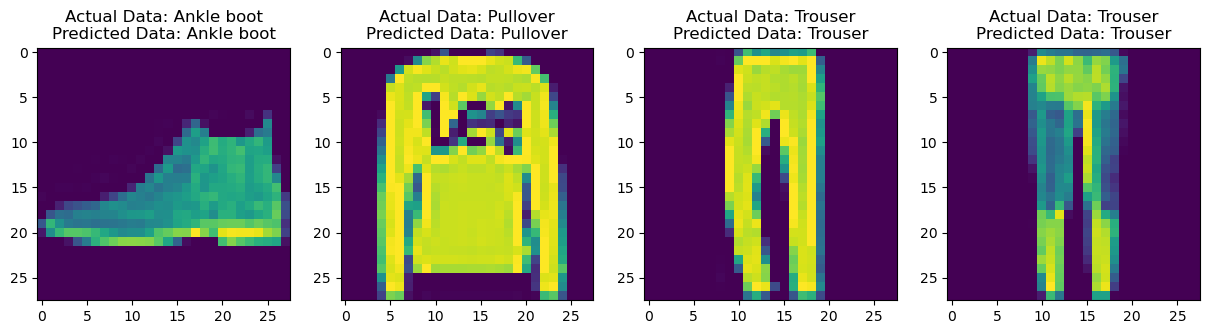

In [71]:
# Define function to display sample images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_sample_images(images, labels_actual, labels_pred, class_names, num_samples=4):
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(f"Actual Data: {class_names[labels_actual[i]]}\nPredicted Data: {class_names[labels_pred[i]]}")
    plt.show()

# Display sample images
plot_sample_images(x_test, y_test, y_pred_classes, class_names, num_samples=4)

For the overall results, the model performed the best for the validation set with an equivalent accuracy of ~90% as the training dataset with minimum loss, followed by  the test dataset with an accuracy of ~78%. However, the samples taken from test dataset were predicted correctly.

# **8. Testing with new images**


Test the model with at least two images (from internet or take a photo with your phone or camera). 

Do not forget to convert the image to the Fashion MNIST format: grayscale, $28\times 28$, apply normalization, etc. 

Comment the results.

In [80]:
# Importing OpenCV file
import cv2

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 28x28
    image = cv2.resize(image, (28, 28))
    # Normalize the pixel values to range [0, 1]
    image = image / 255.0
    # Reshape the image to match the input shape of the model
    image = np.reshape(image, (1, 28, 28))
    return image

In [83]:
# Path to the images
image_paths = [r'C:\Users\Disha\TU Braunschweig\Deep Learning\Deep Learning Entry Task\Picture 1.webp',
               r'C:\Users\Disha\TU Braunschweig\Deep Learning\Deep Learning Entry Task\Picture 2.jpeg',
               r'C:\Users\Disha\TU Braunschweig\Deep Learning\Deep Learning Entry Task\Picture 3.jpeg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


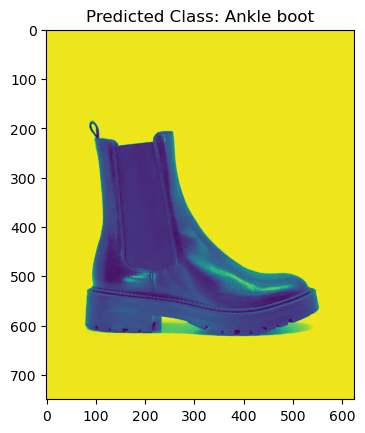

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


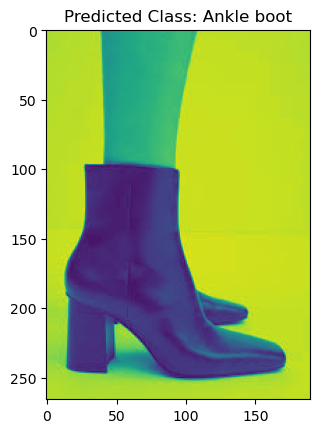

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


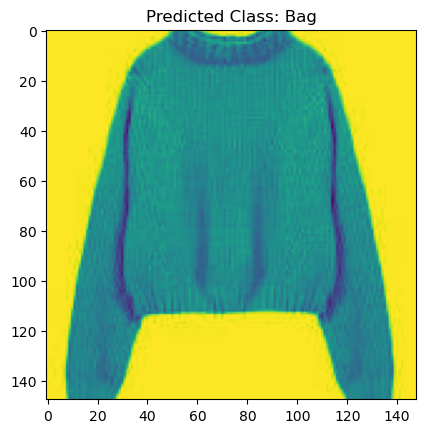

In [84]:
# Process each image via function 
for image_path in image_paths:
    # Preprocess the image
    image = preprocess_image(image_path)
    # Predict the class label using your loaded model
    predicted_class = np.argmax(model.predict(image))
    # Display the image
    plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE))
    plt.title(f"Predicted Class: {class_names[predicted_class]}")
    plt.show()

Comments: First 2 images are being predicted correctly but the last image is also predicted as bag instead of a pullover. Hence the model needs to be trained more inorder to increase the accuracy.



# **9. How could we improve the trained model?**

Share your ideas and comments to further improve the results.

1. Taking the example of the wrongly predicted image, we can add train the model by adding more number of hidden layers and addition of more neurons.

2. Hyperparameter tuning. Using a different optimiser than adam can help.

3. Using regularisation method as adding dropout layers, L1 or L2 regularisation and can help with overfitting.

4. Analysing the model via understanding the training results to gain more inisights on its prediction and behaviour.

5. Ofcourse, increase the training data (taking in general terms) and increading the diversity of the dataset.

6. Using a different model architecture than MLP, say CNN can help too.